## Compare the ssGEMs size(gene/rxns) among strains from different clade
- 1.size comparison
- 2.common lost gene&reaction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set work dir
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# load ssGEM size data
df_model_size = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/2.GIMME_buildmodel/output/gimme_ssGEMs_size.csv',index_col=0)

# add .re behind of each index string
df_model_size.index = [i+'.re' for i in df_model_size.index]
df_model_size

,gene_number,reaction_number,metabolite_number
AAA_6.re,1019,3758,2655
AAB_6.re,1011,3720,2691
AAD_6.re,998,3738,2661
AAE_6.re,1035,3739,2667
AAG_6.re,1016,3750,2699
...,...,...,...
YDF.re,1025,3742,2638
YDH.re,1019,3755,2680
YDI.re,1021,3738,2648
YDJ.re,1005,3704,2641


In [3]:
# load strain info
df_strain_info = pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)
df_strain_info

,strain,source,original_ecological_description,geographic_origin,Ploidy,type,sub_type,lg_classify,assemble_level,genomeSize,contigNums,N50,gene_numb,remove,nature_clade,growth_type
genome_id,,,,,,,,,,,,,,,,
BFC_3.re,EXF-5295,1011_nature,Fermentation,Slovenia,2,Fermentation,Fermentation,Fermentation,contig,11830106.0,1534.0,203532.0,6380.0,False,1. Wine/European,medium
AGL_2.re,CBS4458,1011_nature,Wine,France,1,Wine,Wine,Wine,contig,12043831.0,4846.0,141324.0,6280.0,False,1. Wine/European,slow
ABE_5.re,YJM434_1b,1011_nature,"Human, clinical",0,1,Human,Human,"Human, clinical",contig,12024093.0,4239.0,165966.0,6353.0,False,1. Wine/European,fast
YAM.re,YJM453,1011_nature,"Human, clinical",0,2,Unknow,0,NaN,contig,11826830.0,1674.0,122940.0,6385.0,False,1. Wine/European,medium
BKI_2.re,DBVPG1554,1011_nature,Wine,Dalmatia,2,Wine,Wine,Wine,contig,11761442.0,1477.0,221563.0,6370.0,False,1. Wine/European,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCA_001741415.1_ASM174141v1_genomic,beer013,lg_others,Beer,0,0,Wine,Beer,Beer,chromosome,12289288.0,298.0,920709.0,6431.0,False,NaN,NaN
GCA_001738495.1_ASM173849v1_genomic,bread003,lg_others,Bakery,0,0,Fermentation,Bakery,Bakery,chromosome,12343512.0,360.0,905142.0,6392.0,False,NaN,NaN
GCA_001669965.1_ASM166996v1_genomic,T.52_2H,lg_others,Wine,0,0,Wine,Wine,Wine,chromosome,12111851.0,17.0,922821.0,6404.0,False,NaN,NaN


In [4]:
df_model_size['type']=df_model_size.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])

# remove type nan
df_model_size = df_model_size.dropna(subset=['type'])
df_model_size

wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# change all type in wildtypelist to wildtype
df_model_size['type'] = df_model_size['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)

# remove clade if it has less than 15 strains
df_model_size = df_model_size.groupby('type').filter(lambda x: len(x) >= 15)

# sort df_model_size by type,and set wildtype as the first
df_model_size = df_model_size.sort_values(by='type',ascending=False)
df_model_size

# save the df_model_size
# df_model_size.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_ssGEMs_size.csv')

C:\Users\wangh\AppData\Local\Temp\ipykernel_45812\3942114051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_size['type'] = df_model_size['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)


,gene_number,reaction_number,metabolite_number,type
CDL_3.re,1022,3766,2674,wildtype
BAI_7.re,1009,3754,2637,wildtype
BAG_6.re,1017,3751,2659,wildtype
CEI_2.re,1016,3742,2671,wildtype
AKM_4.re,1018,3740,2645,wildtype
...,...,...,...,...
BLT_2.re,1010,3740,2684,1. Wine/European
BLR_3.re,1022,3729,2658,1. Wine/European
BLQ_1.re,1001,3742,2690,1. Wine/European
BLP_5.re,1037,3733,2653,1. Wine/European


8. Mixed origin  0.040484432802601895
5. French dairy  7.465018483411236e-07
13. African palm wine  0.001890672482089727
10. French Guiana human  0.0006516710916285659
1. Wine/European (subclade 4) 3.998094442371781e-06
1. Wine/European (subclade 3) 0.01624451626783789


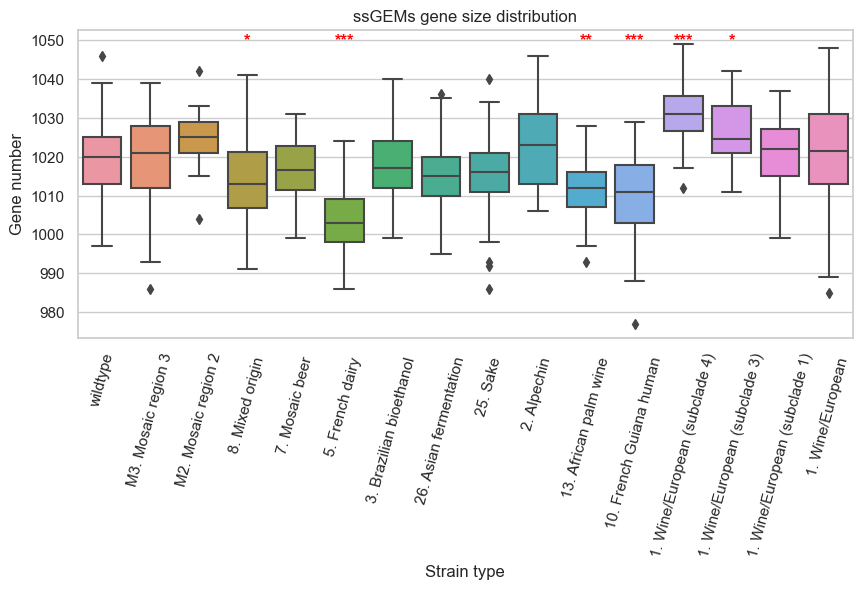

In [5]:
# plot size distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="gene_number", data=df_model_size)
plt.title('ssGEMs gene size distribution')
plt.ylabel('Gene number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# plt.show()
# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['gene_number'], df_model_size[df_model_size['type']=='wildtype']['gene_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 1050, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()


M3. Mosaic region 3 1.9814928600687142e-05
M2. Mosaic region 2 0.004029207200211785
8. Mixed origin  0.0012816714990000284
5. French dairy  1.7616554541916832e-07
3. Brazilian bioethanol  0.011115784998478798
25. Sake  0.0006676881629782517
13. African palm wine  0.0010906508130764298
10. French Guiana human  5.819155480145493e-07
1. Wine/European (subclade 1) 0.018683093153158095
1. Wine/European  0.0049287117799630764


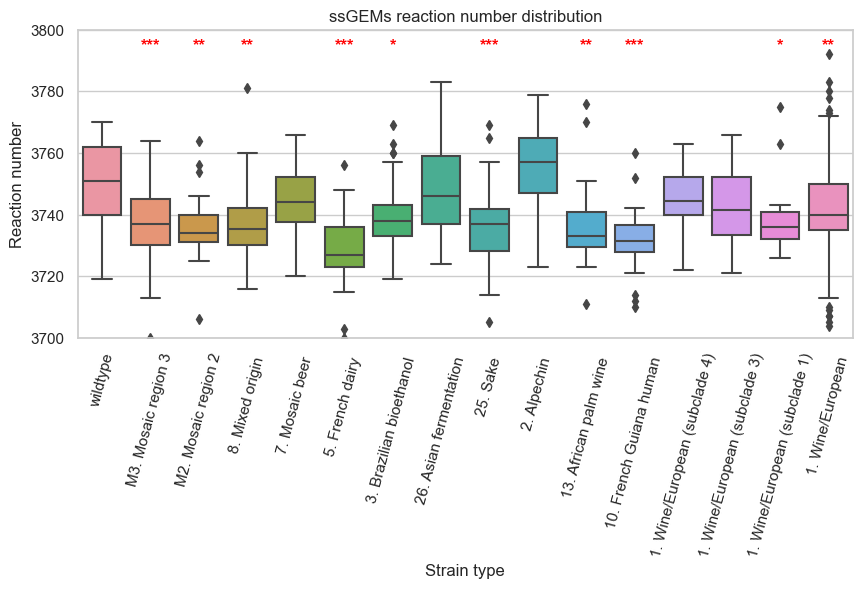

In [6]:
# plot reaction number distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="reaction_number", data=df_model_size)
# violin plot
# sns.violinplot(x="type", y="reaction_number", data=df_model_size, palette="Set3")
plt.title('ssGEMs reaction number distribution')
plt.ylabel('Reaction number')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
plt.ylim(3700,3800)
# plt.show()

# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        if p < 0.05:
            print(t, p)
            # add * to the plot
            if p < 0.001:
                sig='***'
            elif p < 0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_model_size['type'].unique().tolist().index(t), 3795, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()

- conclusion:

bioethanol/diary/human clade show smaller metabolic network than wild type,so we need to further detect the specific difference about metabolic network among different strain type.

### 2.check the lost reaction in each strain

In [7]:
# load reaction matrix
rxnMatrix = pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/2.GIMME_buildmodel/output/gimme_ssGEMs_rxnMatrix.csv',index_col=0)
rxnMatrix

,AAA_6.re,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
r_0001,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0002,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0003,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
r_0004,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
r_0005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4629,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
r_4631,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
r_4632,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
r_4702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# set wildtype core reaction list as the reference to compare with other strains
ref_strainList=df_model_size[df_model_size['type']=='wildtype'].index.tolist()
ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*1].tolist()

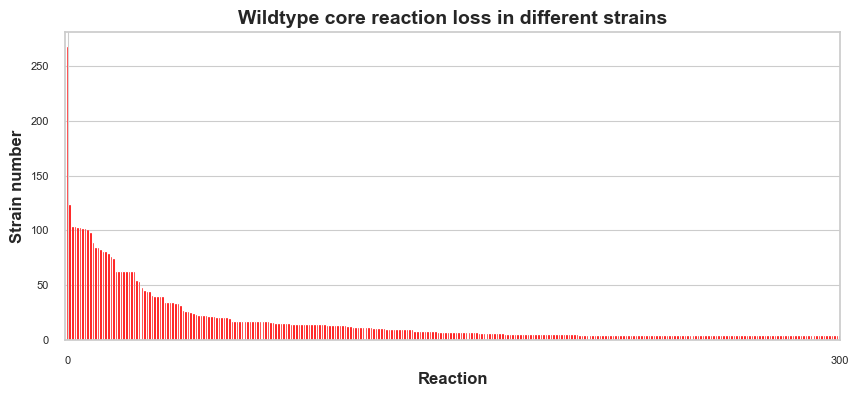

In [11]:
refrxn_Matrix=rxnMatrix.loc[ref_rxnList,:]
# remove ref_strainList from rxnMatrix
refrxn_Matrix=refrxn_Matrix.drop(columns=ref_strainList)

# count 0 value frequence in each row
df_lost_count=refrxn_Matrix.apply(lambda x: len(x[x==0]),axis=1)
df_lost_count.sort_values(ascending=False,inplace=True)
# plot lost reaction number as a bar plot
# set plot theme as scientific
plt.style.use('seaborn-v0_8-paper')
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
fig,ax=plt.subplots(figsize=(10,4))
# set bar width
width=0.6  # Adjust the width value here
df_lost_count.plot(kind='bar',ax=ax,color='red',width=width, align='center',edgecolor=None)
plt.title('Wildtype core reaction loss in different strains',fontsize=14,fontweight='bold')
plt.ylabel('Strain number',fontsize=12,fontweight='bold')
plt.xlabel('Reaction',fontsize=12,fontweight='bold')
# do not show x label
plt.xticks([])
# set x range
plt.xlim(-1,300)
# label 0 , 300 in x axis
plt.xticks([0,300],['0','300'],rotation=0)
plt.show()

In [85]:
# save df_lost_count
df_lost_count.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_core_rxn_loss.csv')

In [9]:
from gseapy import barplot
import gseapy as gp
def enr_analysis(rxnList,pathway_dict,background,title='enrichment analysis'):
    enr=gp.enrichr(gene_list=rxnList,
                   gene_sets=pathway_dict,
                   background=background,
                   outdir=None,
                   no_plot=True)
    
    # plot
    try:
        ax=barplot(enr.res2d,
                column='Adjusted P-value',
                    title=title,cutoff=0.05,figsize=(4,2))
    except:
        print('No significant enrichment')
    return enr.res2d

# load pathway dict
import cobra
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
pathway_dict={}
for group in model.groups:
    name=group.name
    # if 'Transport' in name:
    #     continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

In [12]:
# print top 20 lost reaction, the reaction name and the subsystem
for i in df_lost_count.index[:20]:
    print(i,model.reactions.get_by_id(i).name,model.reactions.get_by_id(i).subsystem)

r_0730 methionyl-tRNA synthetase tRNA metabolism
r_1118 aspartate-glutamate transporter Transport [c, m]
r_3215 PI 4,5-P2 phosphatase (1-18:1, 2-18:1), ER membrane Inositol phosphate metabolism
r_3213 PI 4,5-P2 phosphatase (1-16:1, 2-18:1), ER membrane Inositol phosphate metabolism
r_3208 PI 4,5-P2 phosphatase (1-16:0, 2-16:1), ER membrane Inositol phosphate metabolism
r_3214 PI 4,5-P2 phosphatase (1-18:0, 2-18:1), ER membrane Inositol phosphate metabolism
r_3209 PI 4,5-P2 phosphatase (1-16:1, 2-16:1), ER membrane Inositol phosphate metabolism
r_3212 PI 4,5-P2 phosphatase (1-16:0, 2-18:1), ER membrane Inositol phosphate metabolism
r_3210 PI 4,5-P2 phosphatase (1-18:0, 2-16:1), ER membrane Inositol phosphate metabolism
r_3211 PI 4,5-P2 phosphatase (1-18:1, 2-16:1), ER membrane Inositol phosphate metabolism
r_3104 PC phospholipase D (1-16:0, 2-16:1), cell envelope Glycerophospholipid metabolism
r_3109 PC phospholipase D (1-16:1, 2-18:1), cell envelope Glycerophospholipid metabolism
r_310

20th lost strains: 62
40th lost strains: 34
60th lost strains: 20


d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


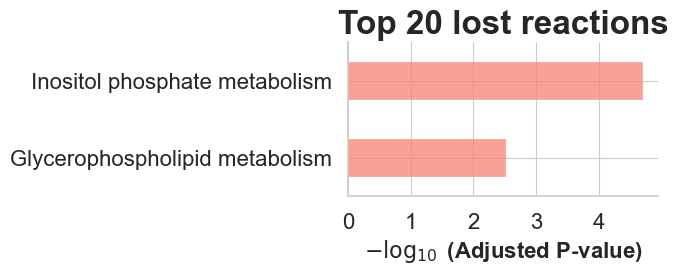

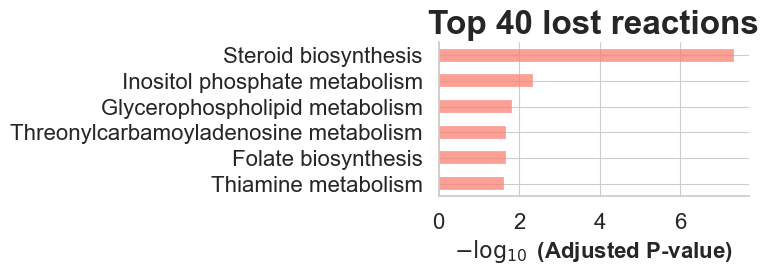

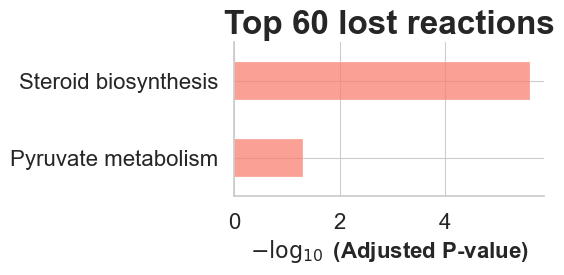

In [13]:
rxn_nums=[20,40,60]
# rxn_nums=[40]
for num in rxn_nums:
    rxnList=df_lost_count.index[:num].tolist()
    print(f'{num}th lost strains: {df_lost_count.iloc[num-1]}')
    enr_res=enr_analysis(rxnList,pathway_dict,background=None,title=f'Top {num} lost reactions')


In [89]:
enr_res.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_lost_corerxn_enrichment_analysis.csv')

### 3.check different lost reaction/gene in different clade

In [90]:
# select the clades that mean rxn size is significantly smaller than wildtype
from scipy import stats
sig_clades = []
for t in df_model_size['type'].unique():
    wt_mean = df_model_size[df_model_size['type']=='wildtype']['reaction_number'].mean()
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        mean= df_model_size[df_model_size['type']==t]['reaction_number'].mean()
        if p < 0.05 and mean<wt_mean:
            sig_clades.append(t)
            print(t, p, mean, wt_mean)

M3. Mosaic region 3 1.981492860068714e-05 3737.483146067416 3748.675675675676
M2. Mosaic region 2 0.0040292072002117854 3736.529411764706 3748.675675675676
8. Mixed origin  0.0012816714990000284 3733.65 3748.675675675676
5. French dairy  1.7616554541916832e-07 3726.88 3748.675675675676
3. Brazilian bioethanol  0.011115784998478801 3740.6666666666665 3748.675675675676
25. Sake  0.0006676881629782517 3730.4347826086955 3748.675675675676
13. African palm wine  0.0010906508130764298 3736.814814814815 3748.675675675676
10. French Guiana human  5.819155480145493e-07 3731.733333333333 3748.675675675676
1. Wine/European (subclade 1) 0.018683093153158106 3739.0588235294117 3748.675675675676
1. Wine/European  0.004928711779963081 3741.799212598425 3748.675675675676


In [91]:
def extract_clade_strainList(clade,df_info):
    strainList=df_info[df_info['type']==clade].index.tolist()
    return strainList


def calculate_rxn_freq(rxnMatrix):
    '''Calculate the frequency of each rxn in the strainList'''
    rxn_freq=rxnMatrix.sum(axis=1)/len(rxnMatrix.columns)
    return rxn_freq

def extract_clade_lost_rxn(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.9):
    ref_strainList=extract_clade_strainList(reference,df_info)
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]

    clade_strainList=extract_clade_strainList(target_clade,df_info)
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]

    ref_rxnList=ref_rxnMatrix.index[ref_rxnMatrix.sum(axis=1)>=len(ref_strainList)*threshold].tolist()
    clade_rxnList=clade_rxnMatrix.index[clade_rxnMatrix.sum(axis=1)>=len(clade_strainList)*(threshold-0.2)].tolist()
    # print(len(clade_strainList))

    lost_rxnList=[i for i in ref_rxnList if i not in clade_rxnList]

    return lost_rxnList


def extract_clade_lost_rxn2(target_clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.2):
    ref_strainList=extract_clade_strainList(reference,df_info)
    ref_rxnMatrix=rxnMatrix.loc[:,ref_strainList]
    ref_rxnfreq=calculate_rxn_freq(ref_rxnMatrix)

    clade_strainList=extract_clade_strainList(target_clade,df_info)
    clade_rxnMatrix=rxnMatrix.loc[:,clade_strainList]
    clade_rxnfreq=calculate_rxn_freq(clade_rxnMatrix)

    df_rxnfreq=pd.DataFrame({'wildtype':ref_rxnfreq,target_clade:clade_rxnfreq})
    df_rxnfreq.fillna(0,inplace=True)
    # define lost reaction as wildtype - target_clade > threshold
    lost_rxnList=df_rxnfreq[(df_rxnfreq['wildtype']-df_rxnfreq[target_clade])>threshold].index.tolist()
    add_rxnList=df_rxnfreq[(df_rxnfreq[target_clade]-df_rxnfreq['wildtype'])>threshold].index.tolist()

    return lost_rxnList,add_rxnList


clades_lost_rxn={}
# clades_add_rxn={}
for clade in sig_clades:
    lost_rxnList=extract_clade_lost_rxn(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=1)
    # lost_rxnList,add_rxnList=extract_clade_lost_rxn2(target_clade=clade,reference='wildtype',rxnMatrix=rxnMatrix,df_info=df_model_size,threshold=0.3)
    clades_lost_rxn[clade]=lost_rxnList
    # clades_add_rxn[clade]=add_rxnList
    print(clade,len(lost_rxnList))

M3. Mosaic region 3 9
M2. Mosaic region 2 9
8. Mixed origin  3
5. French dairy  11
3. Brazilian bioethanol  1
25. Sake  1
13. African palm wine  0
10. French Guiana human  12
1. Wine/European (subclade 1) 9
1. Wine/European  1


In [49]:
# save clades_lost_rxn
import json

with open(r'code/6.transcriptomics_ssGEMs_analysis/output/clades_lost_rxn.json', 'w') as f:
    json.dump(clades_lost_rxn, f)

In [65]:
# do pathway enrichment analysis for lost rxn
import gseapy as gp
from gseapy import barplot, dotplot
# load pathway dict
import cobra
model=cobra.io.read_sbml_model(r'model/yeast-GEM.xml')
pathway_dict={}
for group in model.groups:
    name=group.name
    # if 'Transport' in name:
    #     continue
    rxnIDlist=[rxn.id for rxn in group.members]
    pathway_dict[name]=rxnIDlist

# set wild type as background
wt_strainList=extract_clade_strainList('wildtype',df_info=df_model_size)
wtrxnMatrix=rxnMatrix.loc[:,wt_strainList]
# remove rows with all 0
wtrxnMatrix=wtrxnMatrix.loc[wtrxnMatrix.sum(axis=1)>0,:]
background=wtrxnMatrix.index.tolist()

In [92]:
def enr_analysis(rxnList,pathway_dict,background=None,cutoff=0.05):
    enr=gp.enrich(gene_list=rxnList, # or gene_list=glist
                 gene_sets=pathway_dict,
                 background=background, 
                 outdir=None,
                 verbose=None)
    result=enr.res2d
    result=result[result['Adjusted P-value']<cutoff]
    # set Term as index
    result=result.set_index('Term')
    return result

In [95]:
# do enrichment analysis for each clade
df_clades_score=pd.DataFrame(index=pathway_dict.keys())
df_clades_pvalue=pd.DataFrame()
for clade in clades_lost_rxn.keys():
    print(clade,len(clades_lost_rxn[clade]))
    try:
        result=enr_analysis(clades_lost_rxn[clade],pathway_dict,background=background,cutoff=0.05)
        # print(result)
        df_clades_score[clade]=result['Combined Score']
        df_clades_pvalue[clade]=result['Adjusted P-value']
    except:
        pass

# remove all nan rows
df_clades_score=df_clades_score.dropna(how='all')
# fill all nan with 0
df_clades_score=df_clades_score.fillna(0)

# remove rows with index contain Transport
df_clades_score=df_clades_score[~df_clades_score.index.str.contains('Transport')]

# save df_clades_score
df_clades_score.to_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/clade_lost_rxn_enrichment_analysis.csv')
df_clades_score

M3. Mosaic region 3 9
M2. Mosaic region 2 9
8. Mixed origin  3
5. French dairy  11
3. Brazilian bioethanol  1
25. Sake  1
13. African palm wine  0
10. French Guiana human  12
1. Wine/European (subclade 1) 9
1. Wine/European  1


,M3. Mosaic region 3,M2. Mosaic region 2,8. Mixed origin,5. French dairy,3. Brazilian bioethanol,25. Sake,10. French Guiana human,1. Wine/European (subclade 1),1. Wine/European
Cysteine and methionine metabolism,0.000000,0.000000,290.614646,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
Inositol phosphate metabolism,0.000000,2208.041781,0.000000,66.680729,0.000000,0.0,0.00000,2208.041781,0.000000
Phenylalanine metabolism,0.000000,0.000000,0.000000,286.708982,0.000000,0.0,0.00000,0.000000,0.000000
Pyruvate metabolism,0.000000,0.000000,425.875536,0.000000,0.000000,0.0,0.00000,0.000000,0.000000
Steroid biosynthesis,21693.641234,0.000000,0.000000,0.000000,0.000000,0.0,6395.74237,0.000000,0.000000
tRNA metabolism,0.000000,0.000000,215.851989,0.000000,1412.748173,0.0,0.00000,0.000000,1412.748173


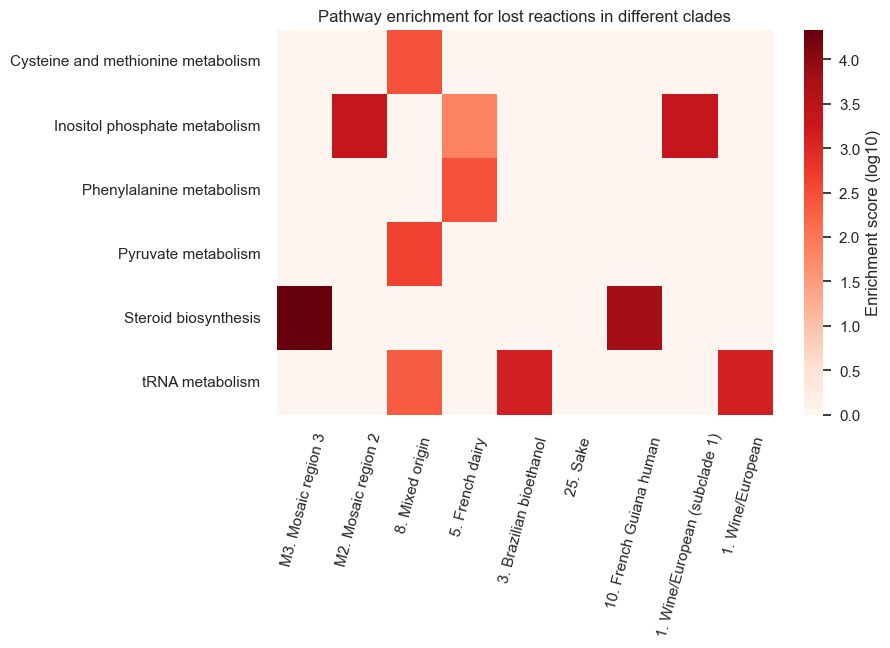

In [94]:
# plot the enrichment score as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# set font style as Arial
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8, 5))
df_clades_score_log=np.log10(df_clades_score+1)
sns.heatmap(df_clades_score_log, cmap="Reds")
plt.title('Pathway enrichment for lost reactions in different clades')
plt.xticks(rotation=75)
# # set color bar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Enrichment score (log10)')
plt.show()

In [108]:
# compare the growth rate difference among different clade
# load growth data
df_exp_data = pd.read_csv('data/transcriptomics/combined_969growth_data.csv', index_col=0)
# remove rows with genome_id is NaN
df_exp_data = df_exp_data[df_exp_data['genome_id'].notnull()]
# set genome_id as index
df_exp_data = df_exp_data.set_index('genome_id')
exp_growth = df_exp_data['t_mid_norm']
exp_growth=1/exp_growth
df_growth=pd.DataFrame({'growth':exp_growth})

# add strain type
df_growth['type']=df_growth.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])
df_growth['type'] = df_growth['type'].map(lambda x: 'wildtype' if x in wildtypelist else x)

# remove clade if it has less than 15 strains
df_growth = df_growth.groupby('type').filter(lambda x: len(x) >= 15)

# sort df_model_size by type,and set wildtype as the first
df_growth = df_growth.sort_values(by='type',ascending=False)
df_growth

,growth,type
genome_id,,
CDF_1.re,0.072395,wildtype
BAN_7.re,0.167500,wildtype
BAQ_7.re,0.095263,wildtype
CCS_1.re,0.081280,wildtype
BAG_6.re,0.094172,wildtype
...,...,...
CFQ_4.re,0.089911,1. Wine/European
CED_4.re,0.073562,1. Wine/European
BIP_3.re,0.177262,1. Wine/European


M3. Mosaic region 3 0.28002406764177534
M2. Mosaic region 2 0.5734996781484909
8. Mixed origin  0.013805164012497996
7. Mosaic beer  0.0648629825291793
6. African beer  0.41553890583074593
5. French dairy  2.759836226943344e-06
3. Brazilian bioethanol  0.0012320724935609162
26. Asian fermentation  0.016323394021324503
25. Sake  0.2925131109609716
2. Alpechin  0.0010108223118711415
13. African palm wine  0.3175837280907131
10. French Guiana human  0.288479755067531
1. Wine/European (subclade 4) 0.046978210154821204
1. Wine/European (subclade 3) 1.7037453285474043e-06
1. Wine/European (subclade 1) 0.2743971242179849
1. Wine/European  0.33002330720345685


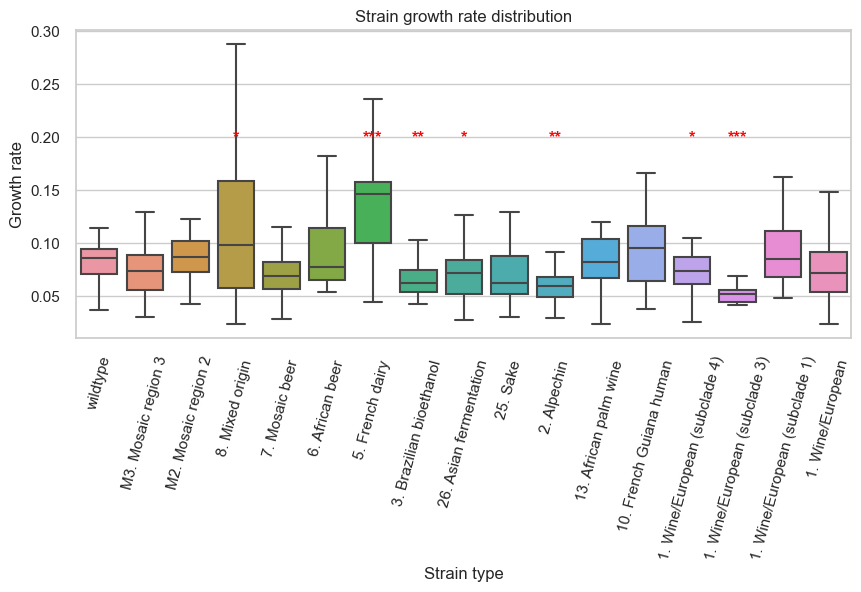

,growth,type
genome_id,,
CDF_1.re,0.072395,wildtype
BAN_7.re,0.167500,wildtype
BAQ_7.re,0.095263,wildtype
CCS_1.re,0.081280,wildtype
BAG_6.re,0.094172,wildtype
...,...,...
CFQ_4.re,0.089911,1. Wine/European
CED_4.re,0.073562,1. Wine/European
BIP_3.re,0.177262,1. Wine/European


In [111]:
# plot box plot, and calculate the pvalue of each clade to wildtype
plt.figure(figsize=(10, 4))
sns.boxplot(x="type", y="growth", data=df_growth,showfliers=False)
plt.title('Strain growth rate distribution')
plt.ylabel('Growth rate')
plt.xlabel('Strain type')
plt.xticks(rotation=75)
# calculate p value
from scipy import stats
df_p = pd.DataFrame()
for t in df_growth['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_growth[df_growth['type']==t]['growth'], df_growth[df_growth['type']=='wildtype']['growth']).pvalue
        print(t, p)
        if p < 0.05:
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            plt.text(df_growth['type'].unique().tolist().index(t), 0.2, sig, fontsize=12, ha='center', va='center', color='red', weight='bold')
plt.show()
df_growth